## Ezitech Intenship

### Muhammad Mehroz 


### Exploration

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [80]:
raw_data = pd.read_csv("spam_ham_dataset.csv")

In [81]:
raw_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [82]:
print(raw_data['text'][0])
print(raw_data['label'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
ham


In [83]:
raw_data['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [84]:
raw_data['label'].isnull().sum()

0

## EDA

Text(0.5, 1.0, 'Number of Spam and Ham')

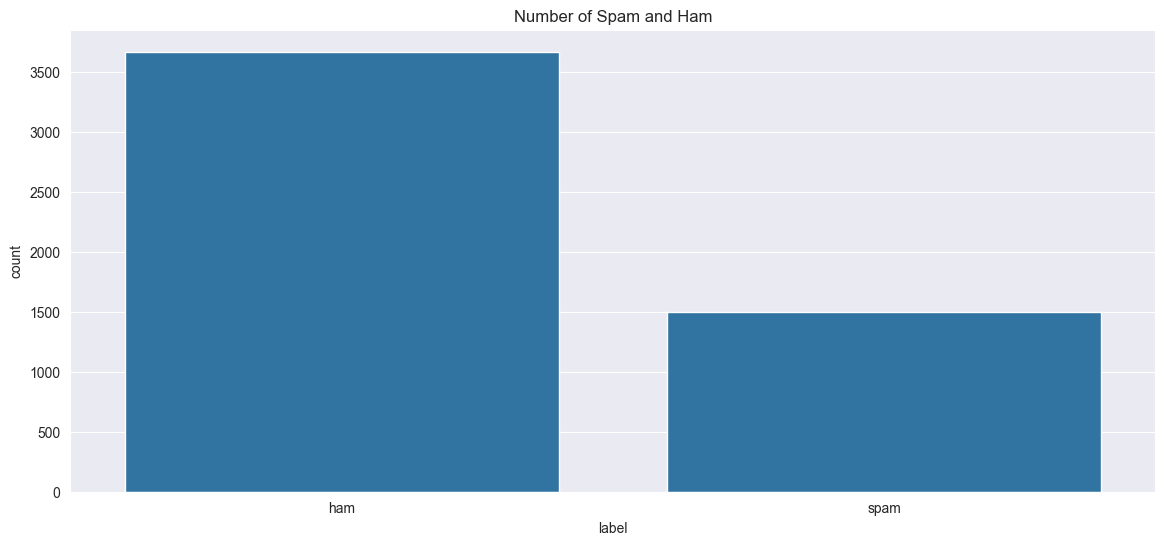

In [85]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='label',data=raw_data)
plt.title("Number of Spam and Ham")

## Feature Engineering

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import string

from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.pipeline import Pipeline

# score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## Function to Remove Punctuation and Stopwords

In [87]:
# function to remove punctuation and stopwords
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in nltk.corpus.stopwords.words('english')]

## Spliting Data

In [88]:
x =  raw_data['text']
y = raw_data['label']


In [89]:
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size=0.33,random_state=43)

In [90]:

print('Train label Data Shape-->',x_train.shape)
print('Test label Data Shape-->',x_test.shape)

Train label Data Shape--> (3464,)
Test label Data Shape--> (1707,)


### Making Pipelines

'bow': This step uses a CountVectorizer to convert text data into a matrix of token counts. The analyzer=text_process argument suggests that text_process is a function that preprocesses the text data before tokenization.
<br><br>
'tf': The next step is TfidfTransformer(), which transforms the count matrix from the previous step into a term frequency-inverse document frequency (TF-IDF) representation. This transformation helps in weighting the importance of words in the documents.
<br><br>
'classifier': Finally, the transformed data is fed into the Multinomial Naive Bayes classifier (MultinomialNB()). This classifier is commonly used for text classification tasks, especially when dealing with multiple classes and text data represented as word counts or TF-IDF values.

In [91]:
# pipeline for SVM
pipe_mnb = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [92]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M_ros\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
# Fiting the data
pipe_mnb.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024CD4BCAB00>)),
                ('tf', TfidfTransformer()), ('classifier', MultinomialNB())])

In [94]:
# Testing the Model on Test data
preb_md = pipe_mnb.predict(x_test)

In [95]:
print('The accuracy for Multinomial Classifer:',accuracy_score(y_test,preb_md)*100)

The accuracy for Multinomial Classifer: 91.03690685413005


### Making pipeline for MultinomialNB

In [96]:
pipe_rf =Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [97]:
# Fiting the Data
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024CD4BCAB00>)),
                ('tf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [98]:
pred_rf = pipe_rf.predict(x_test)
pred_rf

array(['ham', 'spam', 'ham', ..., 'ham', 'spam', 'spam'], dtype=object)

In [99]:
print('The accuracy for Random Forest:',accuracy_score(y_test,pred_rf)*100)

The accuracy for Random Forest: 97.48096074985354


### Making pipeline for SVM

In [100]:
# pipeline for Random Forest Classifier
pipe_svc =Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',SVC())
])

In [101]:
# Fiting the Data
pipe_svc.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024CD4BCAB00>)),
                ('tf', TfidfTransformer()), ('classifier', SVC())])

In [103]:
pred_svc = pipe_svc.predict(x_test)

In [104]:
print('The accuracy for SVM:',accuracy_score(y_test,pred_svc)*100)

The accuracy for SVM: 98.76977152899823


In [107]:
pipe_svc.predict(["Subject: nominations for oct . 21 - 23 , 2000\r\n( see attached file : hplnl 021 . xls )\r\n- hplnl 021 . xls"])

array(['ham'], dtype=object)

### Prediction Accuracy

In [108]:
print('The accuracy for Multinomial Classifer:',accuracy_score(y_test,preb_md)*100)
print('The accuracy for Random Forest:',accuracy_score(y_test,pred_rf)*100)
print('The accuracy for SVM:',accuracy_score(y_test,pred_svc)*100)

The accuracy for Multinomial Classifer: 91.03690685413005
The accuracy for Random Forest: 97.48096074985354
The accuracy for SVM: 98.76977152899823


### SVM is more accurate

In [109]:
print("Classification Report")
print(classification_report(y_test,pred_svc))

Classification Report
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1211
        spam       0.96      0.99      0.98       496

    accuracy                           0.99      1707
   macro avg       0.98      0.99      0.99      1707
weighted avg       0.99      0.99      0.99      1707



## Confsion Matrix

Text(0.5, 1.0, 'Confusion Matrix for SVC')

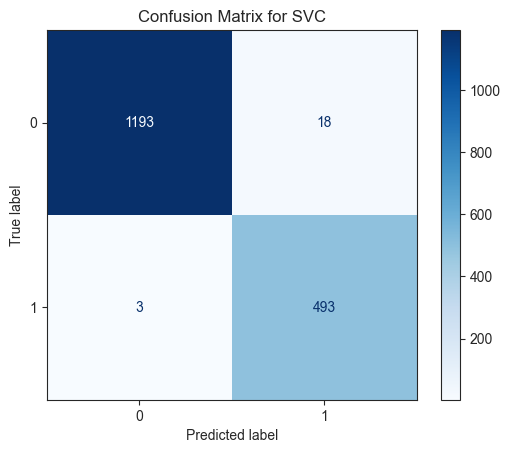

In [111]:
sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_svc)).plot(cmap='Blues')
plt.title("Confusion Matrix for SVC")

## Saving the Model

In [112]:
import pickle


In [115]:
with open("Email_Spam.pkl",'wb') as file:
    pickle.dump("pred_svc",file)

## Making Gradio Interface

In [117]:
import gradio as gr

#### supporting function

In [137]:
def p(email):
    answer = pipe_svc.predict([email])
    return answer[0]

In [138]:
gr.Interface( fn = p , inputs=[gr.Textbox(label='Enter Email')], outputs=[gr.Textbox(label='Spam or Ham')]).launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.12.0, however version 4.29.0 is available, please upgrade.
--------
